# <h1>Classification model (MLP)</h1>

In this notebook, i will create a classification model using MLP from Keras library to predict if a person will have a heart disease or not. Also, i will use funpymodeling because it has useful methods.

In [1]:
!pip install funpymodeling

     |████████████████████████████████| 225kB 7.4MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from funpymodeling.exploratory import status, freq_tbl, profiling_num
from funpymodeling.data_prep import todf

In [23]:
def plot_all(history):
  fig1 = go.Figure()
  fig1.add_trace(go.Scattergl(y=history.history['accuracy'], name='Train'))
  fig1.add_trace(go.Scattergl(y=history.history['val_accuracy'], name='Valid'))
  fig1.update_layout(height=300, width=400,xaxis_title='Epoch',yaxis_title='accuracy')

  fig2 = go.Figure()
  fig2.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
  fig2.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
  fig2.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='Loss')

  return [fig1,fig2]

<h3>Data Loading</h3>

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/pablo14/datasets/main/heart_disease/heart_disease.csv')

<h3>Dataset Status<h3>

In [5]:
data

,age,gender,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electro,max_heart_rate,exer_angina,oldpeak,slope,num_vessels_flour,thal,heart_disease_severity,exter_angina,has_heart_disease
0,63,male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0,no
1,67,male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1,yes
2,67,male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1,yes
3,37,male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0,no
4,41,female,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,male,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,0,yes
299,68,male,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,0,yes
300,57,male,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1,yes
301,57,female,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,0,yes


In [6]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.000000,0,0.000000,41,int64
1,gender,0,0.000000,0,0.000000,2,object
2,chest_pain,0,0.000000,0,0.000000,4,int64
3,resting_blood_pressure,0,0.000000,0,0.000000,50,int64
4,serum_cholestoral,0,0.000000,0,0.000000,152,int64
5,fasting_blood_sugar,0,0.000000,258,0.851485,2,int64
6,resting_electro,0,0.000000,151,0.498350,3,int64
7,max_heart_rate,0,0.000000,0,0.000000,91,int64
8,exer_angina,0,0.000000,204,0.673267,2,int64
9,oldpeak,0,0.000000,99,0.326733,40,float64


In this dataset, there 4 NaNs in 'num_vessels_four' and in 'thal'. Also, there are 2 categorical variables ('has_heart_disease' and 'gender	')

<h3>Data Preparation</h3>

In [7]:
data = data.dropna()

Target and feature separation

In [9]:
data['target'] = data['has_heart_disease'].apply(lambda x: 1 if x == 'yes' else 0)

data_x = data.drop(['target','heart_disease_severity','gender','has_heart_disease'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data_y = to_categorical(data['target'], num_classes=2)

Normalize data

In [12]:
scaler = MinMaxScaler()
data_x = scaler.fit_transform(data_x)

Training set and test set separation

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

<h3>Model Creation</h3>

In [16]:
_,in_shape=x_train.shape

In [17]:
model = Sequential()

model.add(Dense(8, input_dim=in_shape))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

<h3>Model Compilation</h3>

In [18]:
model.compile(optimizer='adagrad',  
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________


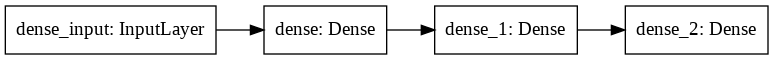

In [20]:
keras.utils.plot_model(model, show_shapes=False, rankdir="LR")

<h3>Model Fitting</h3>

In [21]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32)

Epoch 1/40
8/8 [==============================] - 1s 66ms/step - loss: 0.6843 - accuracy: 0.5266 - val_loss: 0.6833 - val_accuracy: 0.5833
Epoch 2/40
8/8 [==============================] - 0s 7ms/step - loss: 0.6851 - accuracy: 0.5034 - val_loss: 0.6831 - val_accuracy: 0.5833
Epoch 3/40
8/8 [==============================] - 0s 6ms/step - loss: 0.6814 - accuracy: 0.5506 - val_loss: 0.6830 - val_accuracy: 0.6000
Epoch 4/40
8/8 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.5490 - val_loss: 0.6828 - val_accuracy: 0.6000
Epoch 5/40
8/8 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.5294 - val_loss: 0.6827 - val_accuracy: 0.6000
Epoch 6/40
8/8 [==============================] - 0s 6ms/step - loss: 0.6854 - accuracy: 0.5011 - val_loss: 0.6825 - val_accuracy: 0.6000
Epoch 7/40
8/8 [==============================] - 0s 7ms/step - loss: 0.6844 - accuracy: 0.5068 - val_loss: 0.6824 - val_accuracy: 0.6000
Epoch 8/40
8/8 [=================

<h3>Model Validation</h3>

In [24]:
fig1,fig2=plot_all(history)
fig1.show()
fig2.show()

From this graphics, i see that with the epochs, the accuracy increases and the loss function decreases. Also, the validation values are bigget than the train value, so, the model isnt overfitting. 
In conclusion, for the hyperparameters used, and the number of epochs, the model has a good performance.